In [39]:
import torch
import torchvision 
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook

# Setting Up Data
### Downloading, Loading into Dataloader, shuffling and splitting into batches

In [ ]:
#setupData
train = datasets.MNIST('./Datasets/', train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('./Datasets/', train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

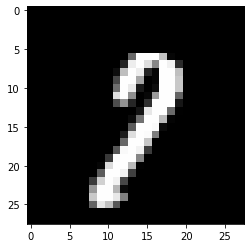

In [11]:
for data in trainset:
    plt.imshow(data[0][0].view(28,28),cmap='gray')
    plt.show()
    break

In [12]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

# The Neural Net

## Creating The Neural Net

In [57]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [58]:
X = torch.rand(28,28)
X = X.view(-1,28*28)
X.shape

torch.Size([1, 784])

In [59]:
output = net(X)
output

tensor([[-2.2365, -2.3458, -2.3344, -2.2882, -2.3314, -2.3535, -2.3349, -2.1926,
         -2.2389, -2.3876]], grad_fn=<LogSoftmaxBackward>)

## Training The Neural Net

In [60]:
#Training Net
from torch import optim

loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=0.001)

EPOCH = 8

for epoch in tqdm_notebook(range(EPOCH)):
    print(f'Epoch : {epoch}')
    for data in tqdm_notebook(trainset):
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

## Testing The Neural Net

In [62]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.974


In [138]:
def predict(no=0):
    a_featureset = X[no]
    reshaped_for_network = a_featureset.view(-1,784)
    output = net(reshaped_for_network)
    first_pred = output[0]
    return int(torch.argmax(first_pred))


# Visualizing the output

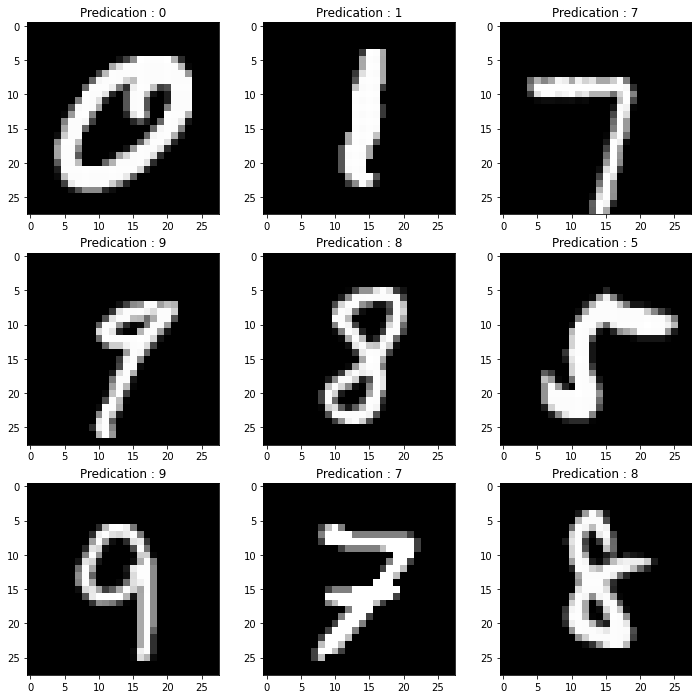

In [153]:
get_no = lambda no : (int(no / 3), no % 3)
figure = plt.figure(figsize=(12,12))
axs = figure.subplots(nrows=3,ncols=3,) 

for i in range(9):
    predication = predict(i)
    axs[get_no(i)].imshow(X[i].view(28,28), cmap='gray')
    axs[get_no(i)].set(title = f'Predication : {predication}')
    
figure.show()